In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm
import numpy as np
import warnings

warnings.filterwarnings('ignore')
plt.rc('font', family='d2coding')

In [12]:
poker_df = pd.read_csv(r'C:\Users\user\Documents\GitHub\poker-game-data-analysis\포커 기록지.csv', index_col=0)

In [13]:
poker_df = poker_df.loc[:, ~poker_df.columns.str.startswith('Unnamed')][poker_df.index.str.contains('2024-02-28')]

In [14]:
poker_df

,임동휘,남형준,이도훈,권주찬,오준혁,김태윤,정재영,유승훈
2024-02-28-01,-5400,NaN,-15000.0,NaN,15400.0,5000.0,NaN,NaN
2024-02-28-02,12000,NaN,8000.0,NaN,-15000.0,-5000.0,NaN,NaN
2024-02-28-03,3900,NaN,7600.0,NaN,4500.0,-15000.0,NaN,NaN


In [15]:
poker_df.describe()

,임동휘,남형준,이도훈,권주찬,오준혁,김태윤,정재영,유승훈
count,3.00000,0.0,3.000000,0.0,3.000000,3.0,0.0,0.0
mean,3500.00000,NaN,200.000000,NaN,1633.333333,-5000.0,NaN,NaN
std,8706.89382,NaN,13165.105393,NaN,15401.406862,10000.0,NaN,NaN
min,-5400.00000,NaN,-15000.000000,NaN,-15000.000000,-15000.0,NaN,NaN
25%,-750.00000,NaN,-3700.000000,NaN,-5250.000000,-10000.0,NaN,NaN
50%,3900.00000,NaN,7600.000000,NaN,4500.000000,-5000.0,NaN,NaN
75%,7950.00000,NaN,7800.000000,NaN,9950.000000,0.0,NaN,NaN
max,12000.00000,NaN,8000.000000,NaN,15400.000000,5000.0,NaN,NaN


In [16]:
pd.DataFrame(poker_df.sum(), columns=["누적 수익"]).T

,임동휘,남형준,이도훈,권주찬,오준혁,김태윤,정재영,유승훈
누적 수익,10500.0,0.0,600.0,0.0,4900.0,-15000.0,0.0,0.0


In [17]:
for col in poker_df.columns:
    data = poker_df[col].dropna()
    skew_val = skew(data)
    kurt_val = kurtosis(data)
    print(f'Column: {col}, Skewness: {skew_val}, Kurtosis: {kurt_val}')

Column: 임동휘, Skewness: -0.08422016100087437, Kurtosis: -1.5
Column: 남형준, Skewness: nan, Kurtosis: nan
Column: 이도훈, Skewness: -0.7063724921222369, Kurtosis: -1.5
Column: 권주찬, Skewness: nan, Kurtosis: nan
Column: 오준혁, Skewness: -0.330096554589187, Kurtosis: -1.5
Column: 김태윤, Skewness: 0.0, Kurtosis: -1.4999999999999998
Column: 정재영, Skewness: nan, Kurtosis: nan
Column: 유승훈, Skewness: nan, Kurtosis: nan


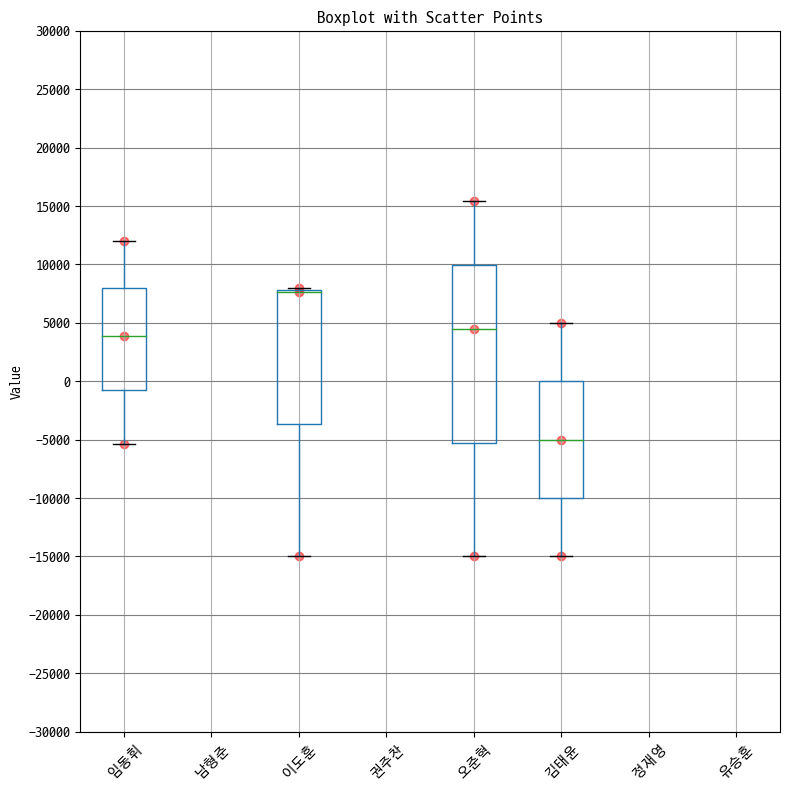

In [8]:
plt.figure(figsize=(8, 8))
poker_df.boxplot()

# 각각의 값들에 대한 scatter plot 추가
for i, col in enumerate(poker_df.columns):
    x = [i + 1] * poker_df[col].count() 
    plt.scatter(x, poker_df[col].dropna(), color='red', alpha=0.5)

plt.title('Boxplot with Scatter Points')
plt.ylabel('Value')
plt.xticks(ticks=range(1, len(poker_df.columns) + 1), labels=poker_df.columns, rotation=45)  # x축 라벨 설정
plt.yticks(range(-30000, 30001, 5000))  # y축 눈금 설정
plt.grid(axis='y', color='gray', linestyle='-')  # y축 그리드 설정
plt.tight_layout()
plt.show()


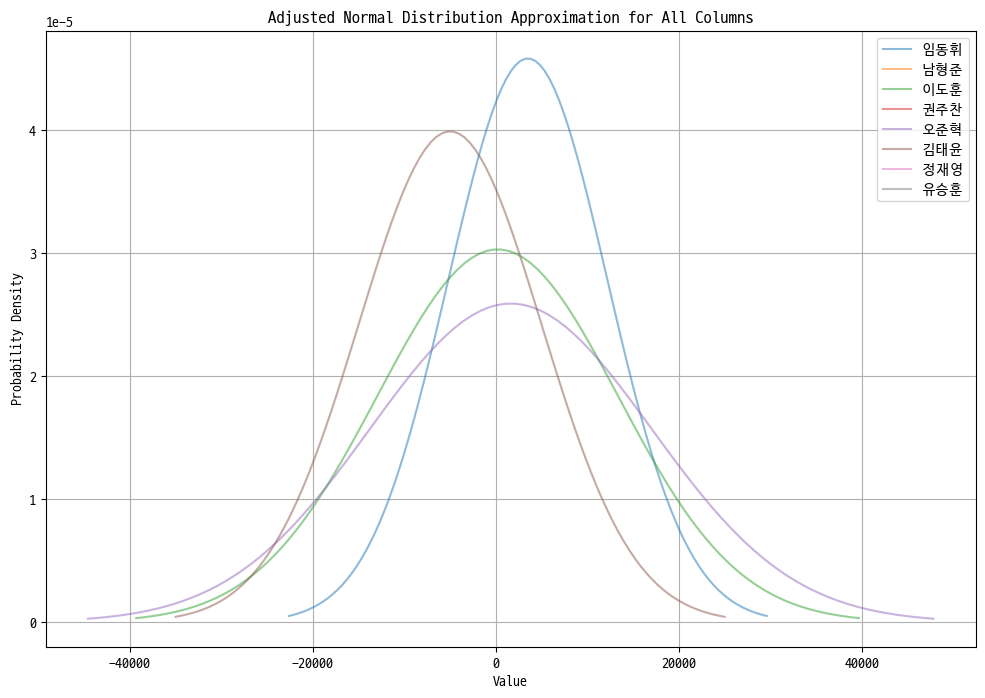

In [9]:
# 그래프 그리기
plt.figure(figsize=(12, 8))

# 각 컬럼 별로 그래프 그리기
for col in poker_df.columns:
    data = poker_df[col].dropna()
    mean = data.mean()
    std = data.std()

    # 왜도를 고려하여 정규 분포를 근사화하기 위한 x 값 생성
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    
    # 정규 분포 함수 값 계산
    y = norm.pdf(x, mean, std)
    
    # 조정된 정규 분포 함수 값 계산
    adj_y = norm.pdf(x, mean, std)
    
    # 그래프 그리기
    plt.plot(x, adj_y, label=f'{col}', alpha=0.5)

plt.title('Adjusted Normal Distribution Approximation for All Columns')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()


 - skewness가 1 이상이면 정규분포 근사가 어려움

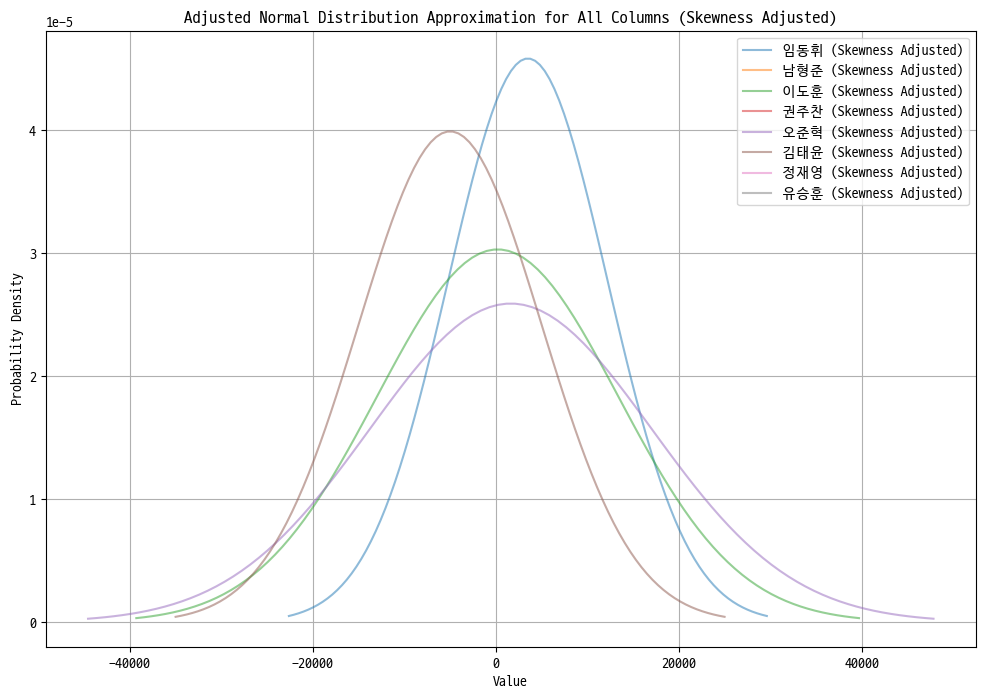

In [10]:
# 그래프 그리기
plt.figure(figsize=(12, 8))

# 각 컬럼 별로 그래프 그리기
for col in poker_df.columns:
    data = poker_df[col].dropna()
    mean = data.mean()
    std = data.std()
    skewness = skew(data)

    # 왜도가 1보다 큰 경우에는 로그 변환을 적용하여 데이터 보정
    
    
    # 보정된 데이터로부터 평균과 표준편차 다시 계산
    mean = data.mean()
    std = data.std()

    # 왜도를 고려하여 정규 분포를 근사화하기 위한 x 값 생성
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    
    # 정규 분포 함수 값 계산
    y = norm.pdf(x, mean, std)
    
    # 그래프 그리기
    plt.plot(x, y, label=f'{col} (Skewness Adjusted)', alpha=0.5)
    
plt.title('Adjusted Normal Distribution Approximation for All Columns (Skewness Adjusted)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()
